In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm
%matplotlib notebook

In [2]:
class vortex(object):
    '''Vortex element for potential flow calculation'''
    def __init__(self, C, x0=0, y0=0):
        '''Initialize vortex given strength and location'''
        self.C = C
        self.x0 = x0
        self.y0 = y0
        
    def __call__(self, x, y):
        '''Evaluate u-v velocity due to vortex and provided x-y locations'''
        x_rel = x - self.x0
        y_rel = y - self.y0
        rsq = x_rel**2 + y_rel**2 + 1e-1 # adding 1e-1 to avoid element to blow up to infinity 
        u = (self.C / (2 * np.pi)) * -y_rel / rsq
        v = (self.C / (2 * np.pi)) * x_rel / rsq
        return np.stack((u,v), axis = -1) #joins a sequence of arrays along a new axis in the last dimension

In [3]:
class sourcesink(object):
    '''Source/sink element for potential flow calculation'''
    def __init__(self, C, x0=0, y0=0):
        '''Initialize source/sink given strength and location'''
        self.C = C
        self.x0 = x0
        self.y0 = y0
        
    def __call__(self, x, y):
        '''Evaluate u-v velocity due to source/sink and provided x-y locations'''
        x_rel = x - self.x0
        y_rel = y - self.x0
        rsq = x_rel**2 + y_rel**2 + 1e-1 # adding 1e-1 to avoid element to blow up to infinity 
        u = (self.C / (2 * np.pi)) * x_rel / rsq
        v = (self.C / (2* np.pi)) * y_rel / rsq
        return np.stack((u,v), axis = -1) #joins a sequence of arrays along a new axis in the last dimension

In [4]:
class uniform(object):
    '''Uniform flow element for potential flow calculation'''
    def __init__(self, C, x0=0, y0=0):
        '''Initialize uniform flow given strength and location'''
        self.C = C
        self.x0 = x0
        self.y0 = y0
        
    def __call__(self, x, y):
        '''Evaluate u-v velocity due to uniform flow and provided x-y locations'''
        u = self.C * np.ones_like(x)
        v = self.C * np.ones_like(x)
        return np.stack((u,v), axis = -1) #joins a sequence of arrays along a new axis in the last dimension

In [5]:
class doublet(object):
    '''Power law with n = -1 in Az^n for potential flow calculation'''
    def __init__(self, C, x0=0, y0=0):
        '''Initialize doublet power law given strength and location'''
        self.C = C
        self.x0 = x0
        self.y0 = y0
        
    def __call__(self, x, y):
        '''Evaluate u-v velocity due to uniform flow and provided x-y locations'''
        x_rel = x - self.x0
        y_rel = y - self.y0
        rsq = x_rel**2 + y_rel**2 + 1e-1 # adding 1e-1 to avoid element to blow up to infinity 
        rev = y_rel**2 - x_rel**2
        u = (self.C * rev) / rsq**2
        v = (-self.C * 2 * x_rel * y_rel) / rsq**2
        return np.stack((u,v), axis = -1) #joins a sequence of arrays along a new axis in the last dimension

In [6]:
class hexagonal(object):
    '''Power law with n = 3 in Az^n element for the potential flow calculation'''
    def __init__(self, C, x0=0, y0=0):
        '''Initialize hexagonal power law given strength and location'''
        self.C = C
        self.x0 = x0
        self.y0 = y0
        
    def __call__(self, x, y):
        '''Evaluate u-v velocity due to uniform flow and provided x-y locations'''
        x_rel = x - self.x0
        y_rel = y - self.y0
        rsq = x_rel**2 + y_rel**2
        u = 3 * rsq
        v = 6 * x_rel * y_rel
        return np.stack((u,v), axis = -1) #joins a sequence of arrays along a new axis in the last dimension

In [7]:
x = np.arange(-75,-70,.01) # longitude
y = np.arange(40,45,.01) # latitude 
X, Y = np.meshgrid(x,y)

In [8]:
vtx0 = vortex(240, -72.5, 43)
vtx1 = vortex(255, -73, 41)
uni = uniform(24, -74.5, 42)
UV = vtx0(X,Y) + vtx1(X,Y) + uni(X,Y) 

In [9]:
u = UV[...,0]
v = UV[...,1]

In [10]:
speed = np.sqrt(u**2+v**2)

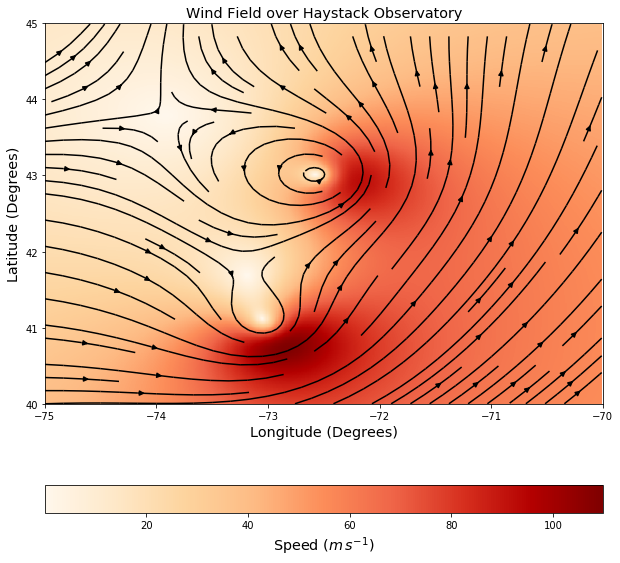

In [11]:
fig, ax = plt.subplots(figsize=(10,10))

cmap = cm.get_cmap('OrRd')

cs = plt.pcolormesh(X, Y, speed, cmap = cmap)

plt.streamplot(x, y, u, v, color = 'black') 
plt.xlim(-75,-70)
plt.ylim(40,45)

plt.title('Wind Field over Haystack Observatory', size = 'x-large')
plt.xlabel('Longitude (Degrees)', size = 'x-large')
plt.ylabel('Latitude (Degrees)', size = 'x-large')

cb = plt.colorbar(cs, orientation = 'horizontal')
cb.set_label(r'Speed ($m\/s^{-1}$)', size = 'x-large')
plt.show()

In [12]:
np.amax(speed)

109.74338571682883

In [13]:
np.amin(speed)

0.07139545112350697

In [14]:
np.mean(speed)

43.92477165236624

# Other Wind Fields

### Wind Field 1

In [15]:
vtx0 = vortex(-315, -72, 43.4)
vtx1 = vortex(292, -73, 41)
src = sourcesink(310, -72, 44)
snk = sourcesink(345, -73.5, 42.5)
UV = vtx0(X,Y) + vtx1(X,Y) + src(X,Y) + snk(X,Y) 

In [16]:
u = UV[...,0]
v = UV[...,1]
speed = np.sqrt(u**2+v**2)

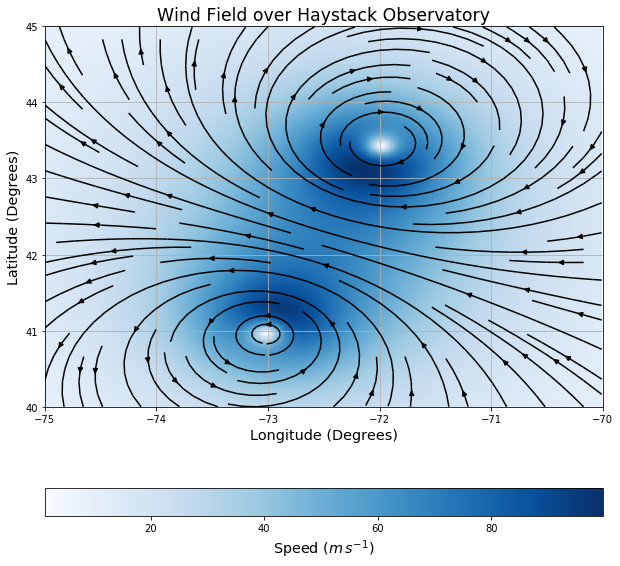

In [17]:
fig = plt.figure(figsize=(10,10))

cmap = cm.get_cmap('Blues')

cs = plt.pcolormesh(X, Y, speed, cmap = cmap)

plt.streamplot(x, y, u, v, color = 'black') 
plt.xlim(-75,-70)
plt.ylim(40,45)

plt.title('Wind Field over Haystack Observatory', size = 'xx-large')
plt.xlabel('Longitude (Degrees)', size = 'x-large')
plt.ylabel('Latitude (Degrees)', size = 'x-large')

cb = plt.colorbar(cs, orientation = 'horizontal')
cb.set_label(r'Speed ($m\/s^{-1})$', size = 'x-large')
plt.grid()

In [18]:
np.amax(speed)

99.63294726402705

In [19]:
np.amin(speed)

1.3907226135690758

In [20]:
np.mean(speed)

35.32423891368457

### Wind Field 2

In [21]:
vtx0 = vortex(290, -71, 43)
vtx1 = vortex(185, -74, 41)
src = sourcesink(100, -73, 42)
snk = sourcesink(-210, -72, 40)
dbt = doublet(-28, -74.5, 44)
uni = uniform(-15,-71,42)
UV = vtx0(X,Y) + vtx1(X,Y) + src(X,Y) + snk(X,Y) + dbt(X,Y) + uni(X,Y) 

In [22]:
u = UV[...,0]
v = UV[...,1]
speed = np.sqrt(u**2+v**2)

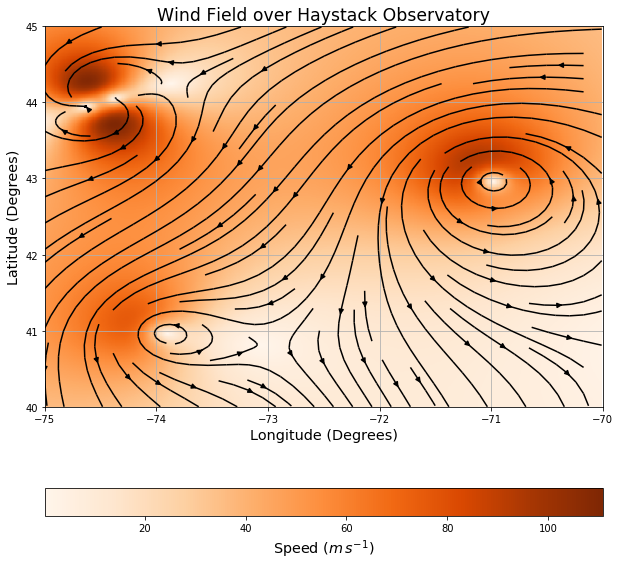

In [23]:
fig = plt.figure(figsize=(10,10))

cmap = cm.get_cmap('Oranges')

cs = plt.pcolormesh(X, Y, speed, cmap = cmap) 

plt.streamplot(x, y, u, v, color = 'black') 
plt.xlim(-75,-70)
plt.ylim(40,45)

plt.title('Wind Field over Haystack Observatory', size = 'xx-large')
plt.xlabel('Longitude (Degrees)', size = 'x-large')
plt.ylabel('Latitude (Degrees)', size = 'x-large')

cb = plt.colorbar(cs, orientation = 'horizontal')
cb.set_label(r'Speed ($m\/s^{-1}$)', size = 'x-large')
plt.grid()

In [24]:
np.amax(speed)

110.90296549646787

In [25]:
np.amin(speed)

0.12010946024562344

In [26]:
np.mean(speed)

39.02115624671757

### Wind Field 3

In [27]:
vtx0 = vortex(230, -72.6, 41)
vtx1 = vortex(170, -71, 43)
hexa = hexagonal(80,-71.8,44)
uni = uniform(5,73.5,42.5)
UV =  vtx0(X,Y) + vtx1(X,Y) + hexa(X,Y) + uni(X,Y)

In [28]:
u = UV[...,0]
v = UV[...,1]
speed = np.sqrt(u**2+v**2)

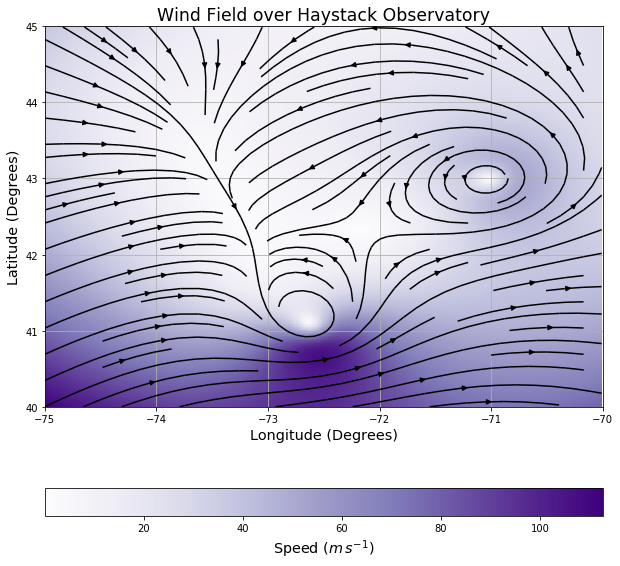

In [29]:
fig = plt.figure(figsize=(10,10))

cmap = cm.get_cmap('Purples')

cs = plt.pcolormesh(X, Y, speed, cmap = cmap)

plt.streamplot(x, y, u, v, color = 'black') 
plt.xlim(-75,-70)
plt.ylim(40,45)

plt.title('Wind Field over Haystack Observatory', size = 'xx-large')
plt.xlabel('Longitude (Degrees)', size = 'x-large')
plt.ylabel('Latitude (Degrees)', size = 'x-large')

cb = plt.colorbar(cs, orientation = 'horizontal')
cb.set_label(r'Speed ($m\/s^{-1}$)', size = 'x-large')
plt.grid()

In [30]:
np.amax(speed)

112.69932983799761

In [31]:
np.amin(speed)

0.08314107339415762

In [32]:
np.mean(speed)

34.2932189328698

### Wind Field 4

In [33]:
vtx0 = vortex(201, -71, 41)
vtx1 = vortex(-290, -74, 44)
src = sourcesink(500, -72.5, 42.5)
uni = uniform(30,-72,44)
UV = vtx0(X,Y) + vtx1(X,Y) + src(X,Y) + uni(X,Y) 

In [34]:
u = UV[...,0]
v = UV[...,1]
speed = np.sqrt(u**2+v**2)

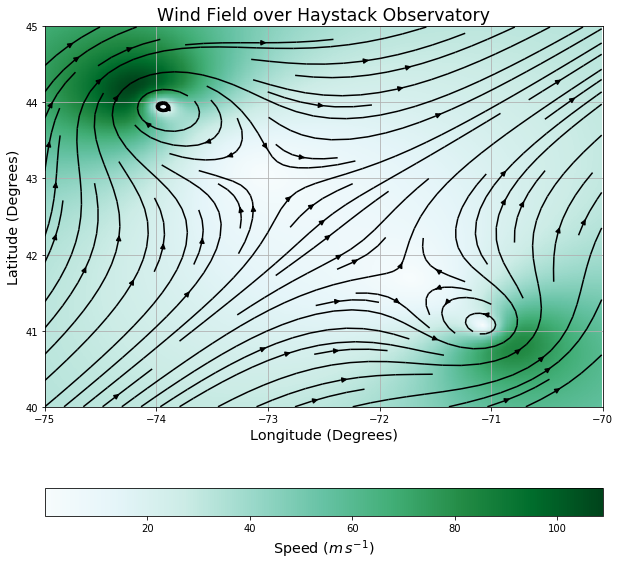

In [35]:
fig = plt.figure(figsize=(10,10))

cmap = cm.get_cmap('BuGn')

cs = plt.pcolormesh(X, Y, speed, cmap = cmap)

plt.streamplot(x, y, u, v, color = 'black') 
plt.xlim(-75,-70)
plt.ylim(40,45)

plt.title('Wind Field over Haystack Observatory', size = 'xx-large')
plt.xlabel('Longitude (Degrees)', size = 'x-large')
plt.ylabel('Latitude (Degrees)', size = 'x-large')

cb = plt.colorbar(cs, orientation = 'horizontal')
cb.set_label(r'Speed ($m\/s^{-1}$)', size = 'x-large')
plt.grid()

In [36]:
np.amax(speed)

108.89879403444995

In [37]:
np.amin(speed)

0.03829053394887447

In [38]:
np.mean(speed)

31.445270456873956

## Attempt to make 3D Wind Field

In [39]:
%matplotlib notebook 
import matplotlib.pyplot as plt
import mpl_toolkits.mplot3d.art3d as a3d
import mpl_toolkits.mplot3d.axes3d as ax3d 

In [40]:
x = np.arange(-75,-70,.01)
y = np.arange(40,45,.01)
z = np.arange(50000,85000,70)
X, Y = np.meshgrid(x,y)

In [41]:
vtx0 = vortex(415, -72.5, 48)
vtx1 = vortex(430, -73, 41)
uni = uniform(-40, -74.5, 42)
UV = vtx0(X,Y) + vtx1(X,Y) + uni(X,Y)

In [42]:
u = UV[...,0]
v = UV[...,1]

speed = np.sqrt(u**2+v**2)

<IPython.core.display.Javascript object>


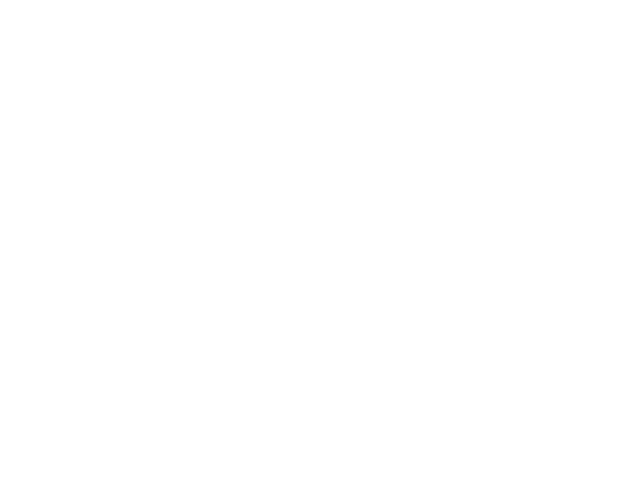

In [43]:
fig = plt.figure()
a = ax3d.Axes3D(fig)
#a.plot(x,y,z)
a.plot(u,v,z)

plt.show()

<IPython.core.display.Javascript object>


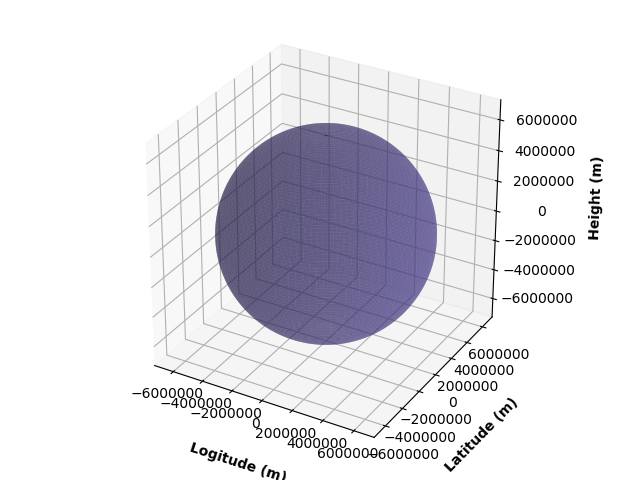

In [44]:
%matplotlib notebook 

import matplotlib.pyplot as plt
import matplotlib.cm as cm
import mpl_toolkits.mplot3d.axes3d as Axes3d 
import numpy as np


r = 6378000 # (m)
pi = np.pi
cos = np.cos
sin = np.sin
phi, theta = np.mgrid[0.0:pi:10000j, 0.0:2.0*pi:10000j]
x = r*sin(phi)*cos(theta)
y = r*sin(phi)*sin(theta)
z = r*cos(phi)

#Import data
# data = np.genfromtxt('leb.txt')
# theta, phi, r = np.hsplit(data, 3) 
# theta = theta * pi / 180.0
# phi = phi * pi / 180.0
# xx = sin(phi)*cos(theta)
# yy = sin(phi)*sin(theta)
# zz = cos(phi)

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

ax.plot_surface(x, y, z,  rstride=100, cstride=100, color='darkslateblue', alpha= 0.5)

#ax.scatter(xx,yy,zz,color="k",s=20)

ax.set_xlim([-7000000,7000000])
ax.set_ylim([-7000000,7000000])
ax.set_zlim([-7000000,7000000])

ax.set_xlabel('Logitude (m)', weight='bold', labelpad=10)
ax.tick_params(axis='x', rotation=0)
ax.tick_params(axis='x', pad=0)

ax.set_ylabel('Latitude (m)', weight='bold', labelpad=15)
ax.tick_params(axis='y', rotation=0)
ax.tick_params(axis='y', pad=5)               
               
ax.set_zlabel('Height (m)', weight='bold', labelpad=30)
ax.tick_params(axis='z', pad=15) 

ax.set_aspect("equal")
plt.tight_layout()
plt.show()